# ValueInvestor



---




**Goal(s):**


Predict stock price valuations on a daily, weekly and monthly basis. Recommend BUY, HOLD, SELL decisions. Maximize capital returns, minimize losses. Ideally a loss should never happen. Minimize HOLD period.


**Data Description:**


A set of portfolio companies trading data from emerging markets including 2020 Q1-Q2-Q3-Q4 2021 Q1 stock prices. Each company stock is provided in different sheets. Each market's operating days varies based on the country of the company and the market the stocks are exchanged. 



**Success Metrics:**

Evaluate on the basis of capital returns. Use Bollinger Bands to measure your systems effectiveness.

# Explore the data and datasets.

In [ ]:
!pip install pmdarima
!pip install git+https://github.com/hyperopt/hyperopt-sklearn
!pip install tpot
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/hyperopt/hyperopt-sklearn to /tmp/pip-req-build-0ja2k706
  Running command git clone --filter=blob:none --quiet https://github.com/hyperopt/hyperopt-sklearn /tmp/pip-req-build-0ja2k706
  Resolved https://github.com/hyperopt/hyperopt-sklearn to commit 4b3f6fde3a1ded2e71e8373d52c1b51a0239ef91
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hpsklearn: filename=hpsklearn-1.0.3-py3-none-any.whl size=135027 sha256=0e0fa8fad89e60e1b282d4db7e78abac45c1152b41ef0759646cbfd1766e12d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-hk2zt3zi/wheels/01/e8/01/ad06c89501e4845c988d4e846f45f3485d9

In [ ]:
pip install fbprophet

In [2]:
#importing libraries
import os
import math
import imblearn
import numpy as np
import pandas as pd
import warnings
from hyperopt import tpe
import seaborn as sns
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')
from datetime import date

from fbprophet import Prophet
from numpy import unique
from numpy import argmax
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from collections import Counter
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import  GRU
#arima model
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Excel file contains several sheets so I open my interested sheets.

In [ ]:
df_Turkey = pd.read_excel('/content/drive/MyDrive/Apziva/Project_5/inputData/2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name = 'Turkey - Koc Holding AS (KCHOL)') 
df_Turkey

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,19.41,19.42,19.63,19.27,13.14M,-0.0046
1,2021-03-30 00:00:00,19.5,19.12,19.81,19.03,21.05M,0.0209
2,2021-03-29 00:00:00,19.1,19.24,19.67,19.1,16.56M,-0.0078
3,2021-03-26 00:00:00,19.25,20.28,20.36,19.1,21.35M,-0.0385
4,2021-03-25 00:00:00,20.02,20.5,20.86,20.02,15.93M,-0.0148
...,...,...,...,...,...,...,...
311,2020-01-07 00:00:00,19.93,20.22,20.28,19.92,2.89M,-0.0075
312,2020-01-06 00:00:00,20.08,20.34,20.34,19.97,1.94M,-0.0108
313,2020-01-03 00:00:00,20.3,20.3,20.44,19.97,3.31M,-0.0039
314,2020-01-02 00:00:00,20.38,20.42,20.44,20.24,2.53M,0.0030


In [ ]:
df_Columbia = pd.read_excel('/content/drive/MyDrive/Apziva/Project_5/inputData/2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name = 'Colombia - Cementos Argos SA (C') 
df_Columbia

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,5150,5100,5170,5100,212.44K,0.0098
1,2021-03-30 00:00:00,5100,5010,5100,5010,583.70K,0.0109
2,2021-03-29 00:00:00,5045,5020,5045,5015,117.54K,0.0050
3,2021-03-26 00:00:00,5020,5085,5085,4980,203.46K,-0.0020
4,2021-03-25 00:00:00,5030,5035,5045,4950,317.06K,0.0010
...,...,...,...,...,...,...,...
299,2020-01-08 00:00:00,6880,6940,6950,6880,84.93K,-0.0101
300,2020-01-07 00:00:00,6950,6950,6950,6850,168.71K,-0.0071
301,2020-01-03 00:00:00,7000,7040,7100,6960,470.77K,-0.0169
302,2020-01-02 00:00:00,7120,7300,7300,7120,138.96K,-0.0247


In [ ]:
df_Russia = pd.read_excel('/content/drive/MyDrive/Apziva/Project_5/inputData/2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name = 'Russia - Sberbank Rossii PAO (S') 
df_Russia

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,291.02,294,294.42,290.26,47.00M,-0.0076
1,2021-03-30 00:00:00,293.25,294.86,295.72,291.5,38.81M,-0.0002
2,2021-03-29 00:00:00,293.3,289.72,294.09,289.26,43.68M,0.0071
3,2021-03-26 00:00:00,291.22,288.63,292.75,288.32,56.07M,0.0159
4,2021-03-25 00:00:00,286.66,286.5,287.03,283.85,35.22M,0.0030
...,...,...,...,...,...,...,...
307,2020-01-09 00:00:00,257.99,259.4,261.76,257.01,38.33M,-0.0045
308,2020-01-08 00:00:00,259.15,253.57,259.15,253.03,40.82M,0.0207
309,2020-01-06 00:00:00,253.9,254.75,254.84,251.4,22.35M,-0.0043
310,2020-01-03 00:00:00,255,255.99,258.19,253.7,35.85M,0.0010


The dataset contains the last row of totals so I will remove it from analysis.

In [ ]:
df_Columbia[315:317]

,Date,Price,Open,High,Low,Vol.,Change %
315,Highest: 25.48,Lowest: 12.38,Difference: 13.10,Average: 17.86,Change %: -4.48,NaN,NaN


In [ ]:
# splitting dataframe by row we will get rid of row 315 df_1_Columbia
df_1_Columbia = df_Columbia.iloc[:302,:]
df_2_Columbia = df_Columbia.iloc[302:,:]

In [ ]:
df_1_Columbia[301:303]

,Date,Price,Open,High,Low,Vol.,Change %
301,2020-01-03 00:00:00,7000,7040,7100,6960,470.77K,-0.0169


Next, I will convert all the data types into compatible data.

In [ ]:
df_1_Columbia = df_1_Columbia.convert_dtypes()

In [ ]:
#replace - characters
df_1_Columbia['Change %'] = df_1_Columbia['Change %'].astype('string')
df_1_Columbia['Vol.'] = df_1_Columbia['Vol.'].astype('string')

In [ ]:
df_1_Columbia['Change %'] = df_1_Columbia['Change %'].str.replace("%", " ")
#replace - characters
df_1_Columbia['Vol.'] = df_1_Columbia['Vol.'].str.replace("M", " ")
#replace - characters
df_1_Columbia['Vol.'] = df_1_Columbia['Vol.'].str.replace("K", " ")
df_1_Columbia['Vol.'] = df_1_Columbia['Vol.'].astype(float)
df_1_Columbia['Price'] = df_1_Columbia['Price'].astype(float)
df_1_Columbia['Open'] = df_1_Columbia['Open'].astype(float)
df_1_Columbia['High'] = df_1_Columbia['High'].astype(float)
df_1_Columbia['Low'] = df_1_Columbia['Low'].astype(float)
df_1_Columbia['Change %'] = df_1_Columbia['Change %'].astype(float)
df_1_Columbia['Date'] = pd.to_datetime(df_1_Columbia['Date'])

Exploring data.

In [ ]:
df_1_Columbia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      314 non-null    datetime64[ns]
 1   Price     314 non-null    float64       
 2   Open      314 non-null    float64       
 3   High      314 non-null    float64       
 4   Low       314 non-null    float64       
 5   Vol.      314 non-null    float64       
 6   Change %  314 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 17.3 KB


No missing values.

In [ ]:
df_1_Columbia.describe()

,Price,Open,High,Low,Vol.,Change %
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,4828.983444,4841.529801,4909.450331,4762.556291,294.089073,-0.000370
std,1018.613152,1018.615537,1006.627118,1022.166650,244.353897,0.037097
min,2420.000000,2500.000000,2600.000000,2415.000000,1.000000,-0.240000
25%,3900.000000,3892.500000,3960.000000,3796.250000,101.232500,-0.011850
50%,4800.500000,4800.000000,4865.000000,4762.000000,248.835000,0.000000
75%,5765.000000,5748.750000,5840.000000,5700.000000,443.407500,0.012200
max,7000.000000,7040.000000,7100.000000,6960.000000,984.060000,0.222200


<Axes: >

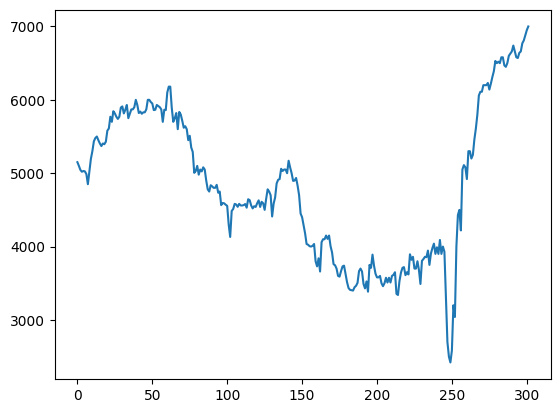

In [ ]:
y = df_1_Columbia['Price']
y.plot()

Splitting data into train and test set.

In [ ]:
filtered_df = df_1_Columbia[df_1_Columbia["Date"].isin(pd.date_range('2020-2-1', '2020-12-31'))]
filtered_df

,Date,Price,Open,High,Low,Vol.,Change %
61,2020-12-30,6180.0,6180.0,6275.0,6020.0,651.79,0.0000
62,2020-12-29,6180.0,5900.0,6180.0,5900.0,876.72,0.0492
63,2020-12-28,5890.0,5705.0,5890.0,5705.0,339.87,0.0333
64,2020-12-24,5700.0,5780.0,5780.0,5700.0,10.42,-0.0087
65,2020-12-23,5750.0,5870.0,5890.0,5720.0,527.28,-0.0120
...,...,...,...,...,...,...,...
277,2020-02-07,6310.0,6360.0,6360.0,6280.0,400.12,-0.0125
278,2020-02-06,6390.0,6530.0,6540.0,6360.0,622.79,-0.0214
279,2020-02-05,6530.0,6590.0,6590.0,6510.0,584.24,0.0046
280,2020-02-04,6500.0,6530.0,6570.0,6500.0,469.99,-0.0031


In [ ]:
validationdf = df_1_Columbia[df_1_Columbia["Date"].isin(pd.date_range('2021-1-1', '2021-12-31'))]
validationdf

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31,5150.0,5100.0,5170.0,5100.0,212.44,0.0098
1,2021-03-30,5100.0,5010.0,5100.0,5010.0,583.70,0.0109
2,2021-03-29,5045.0,5020.0,5045.0,5015.0,117.54,0.0050
3,2021-03-26,5020.0,5085.0,5085.0,4980.0,203.46,-0.0020
4,2021-03-25,5030.0,5035.0,5045.0,4950.0,317.06,0.0010
...,...,...,...,...,...,...,...
56,2021-01-08,5870.0,5805.0,5870.0,5790.0,154.80,0.0298
57,2021-01-07,5700.0,5860.0,5985.0,5700.0,539.18,-0.0281
58,2021-01-06,5865.0,5860.0,5955.0,5860.0,338.98,0.0009
59,2021-01-05,5860.0,6000.0,6000.0,5860.0,457.03,-0.0393


# Exposing different models to data.

## Using popular Facebook fbProphet model to predict prices on a daily, weekly and monthly basis. 

In [ ]:
# create timeseries readable by fbprophet
ts = pd.DataFrame({'ds':filtered_df.Date,'y':filtered_df.Price})
ts.head()

,ds,y
61,2020-12-30,6180.0
62,2020-12-29,6180.0
63,2020-12-28,5890.0
64,2020-12-24,5700.0
65,2020-12-23,5750.0


In [ ]:
# create timeseries readable by fbprophet
tsval = pd.DataFrame({'ds':validationdf.Date,'y':validationdf.Price})
tsval.head()

,ds,y
0,2021-03-31,5150.0
1,2021-03-30,5100.0
2,2021-03-29,5045.0
3,2021-03-26,5020.0
4,2021-03-25,5030.0


<Axes: xlabel='ds'>

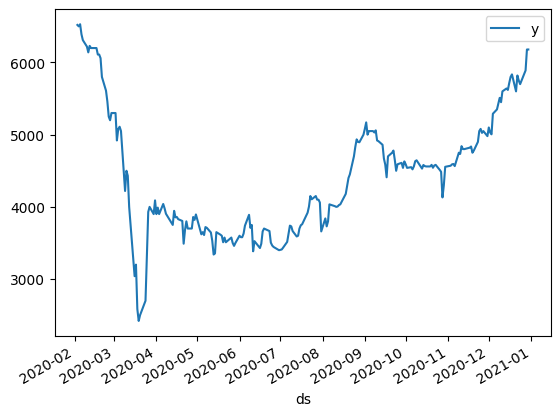

In [ ]:
ts.plot(x='ds',y='y')

In [ ]:
#splitting into train and test
train=ts[:200]
test = ts[200:]

In [ ]:
train

,ds,y
61,2020-12-30,6180.0
62,2020-12-29,6180.0
63,2020-12-28,5890.0
64,2020-12-24,5700.0
65,2020-12-23,5750.0
...,...,...
256,2020-03-09,4220.0
257,2020-03-06,5050.0
258,2020-03-05,5110.0
259,2020-03-04,5080.0


In [ ]:
test.size

42

In [ ]:
test_model =  Prophet(changepoint_prior_scale= 0.5,
                      holidays_prior_scale = 0.1,
                      n_changepoints = 127,
                      seasonality_mode = 'multiplicative',
                      weekly_seasonality=True,
                      daily_seasonality = True,
                      yearly_seasonality = True,                     
                      interval_width=0.95)
test_model.fit(tsval)   

INFO:fbprophet:n_changepoints greater than number of observations. Using 47.


In [ ]:
#predict daily
futureD = train_model.make_future_dataframe(periods=31,freq='D') # Make future date data frame
forecastD = train_model.predict(futureD) # Predict future value.
forecastD.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2020-02-03,682.399153,6412.415258,6709.789840,682.399153,682.399153,8.351816,8.351816,8.351816,8.618294,...,0.398310,0.398310,0.398310,-0.131833,-0.131833,-0.131833,0.0,0.0,0.0,6563.515420
1,2020-02-04,673.866451,6359.470691,6652.847718,673.866451,673.866451,8.351816,8.351816,8.351816,8.655948,...,0.407565,0.407565,0.407565,-0.103433,-0.103433,-0.103433,0.0,0.0,0.0,6506.819328
2,2020-02-05,665.311664,6315.193798,6603.229432,665.311664,665.311664,8.351816,8.351816,8.351816,8.714917,...,0.425592,0.425592,0.425592,-0.062491,-0.062491,-0.062491,0.0,0.0,0.0,6463.447645
3,2020-02-06,654.377563,6242.721390,6548.742209,654.377563,654.377563,8.351816,8.351816,8.351816,8.775764,...,0.429456,0.429456,0.429456,-0.005509,-0.005509,-0.005509,0.0,0.0,0.0,6397.040409
4,2020-02-07,643.187858,6187.200909,6487.116980,643.187858,643.187858,8.351816,8.351816,8.351816,8.849104,...,0.427031,0.427031,0.427031,0.070257,0.070257,0.070257,0.0,0.0,0.0,6334.824217


In [ ]:
#predict weekly
futureW = train_model.make_future_dataframe(periods=2,freq='W') # Make future date data frame 
forecastW = train_model.predict(futureW) # Predict future value.
forecastW.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2020-02-03,682.399153,6410.767459,6720.544382,682.399153,682.399153,8.351816,8.351816,8.351816,8.618294,...,0.398310,0.398310,0.398310,-0.131833,-0.131833,-0.131833,0.0,0.0,0.0,6563.515420
1,2020-02-04,673.866451,6360.608517,6647.712713,673.866451,673.866451,8.351816,8.351816,8.351816,8.655948,...,0.407565,0.407565,0.407565,-0.103433,-0.103433,-0.103433,0.0,0.0,0.0,6506.819328
2,2020-02-05,665.311664,6319.001804,6623.144246,665.311664,665.311664,8.351816,8.351816,8.351816,8.714917,...,0.425592,0.425592,0.425592,-0.062491,-0.062491,-0.062491,0.0,0.0,0.0,6463.447645
3,2020-02-06,654.377563,6249.970248,6549.926949,654.377563,654.377563,8.351816,8.351816,8.351816,8.775764,...,0.429456,0.429456,0.429456,-0.005509,-0.005509,-0.005509,0.0,0.0,0.0,6397.040409
4,2020-02-07,643.187858,6185.315196,6486.462102,643.187858,643.187858,8.351816,8.351816,8.351816,8.849104,...,0.427031,0.427031,0.427031,0.070257,0.070257,0.070257,0.0,0.0,0.0,6334.824217


In [ ]:
# Predict monthly
futureM = train_model.make_future_dataframe(periods=12,freq='MS') # Make future date data frame 
forecastM = train_model.predict(futureM) # Predict future value.
forecastM.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2020-02-03,682.399153,6412.330012,6710.403596,682.399153,682.399153,8.351816,8.351816,8.351816,8.618294,...,0.398310,0.398310,0.398310,-0.131833,-0.131833,-0.131833,0.0,0.0,0.0,6563.515420
1,2020-02-04,673.866451,6354.001064,6649.423950,673.866451,673.866451,8.351816,8.351816,8.351816,8.655948,...,0.407565,0.407565,0.407565,-0.103433,-0.103433,-0.103433,0.0,0.0,0.0,6506.819328
2,2020-02-05,665.311664,6320.450295,6607.647706,665.311664,665.311664,8.351816,8.351816,8.351816,8.714917,...,0.425592,0.425592,0.425592,-0.062491,-0.062491,-0.062491,0.0,0.0,0.0,6463.447645
3,2020-02-06,654.377563,6257.503672,6538.912577,654.377563,654.377563,8.351816,8.351816,8.351816,8.775764,...,0.429456,0.429456,0.429456,-0.005509,-0.005509,-0.005509,0.0,0.0,0.0,6397.040409
4,2020-02-07,643.187858,6183.922316,6485.050066,643.187858,643.187858,8.351816,8.351816,8.351816,8.849104,...,0.427031,0.427031,0.427031,0.070257,0.070257,0.070257,0.0,0.0,0.0,6334.824217


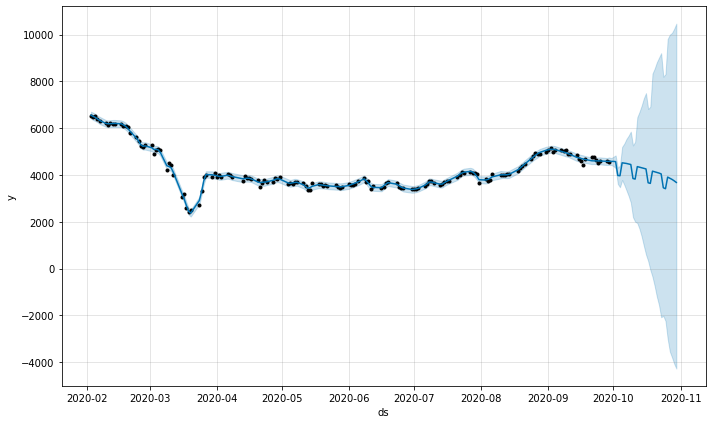

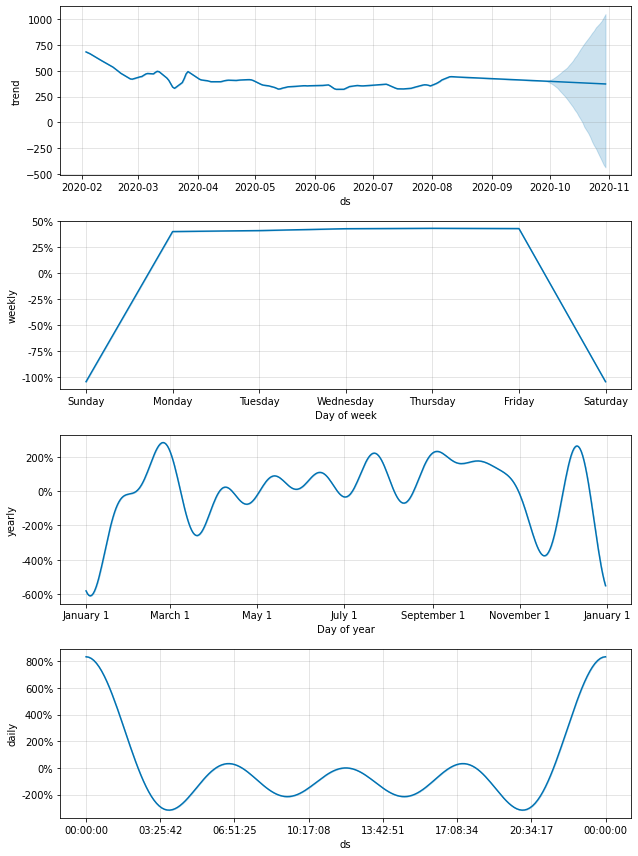

In [ ]:
# Plot results
fig1 = train_model.plot(forecastD) # Plot the fit to past data and future forcast.
fig2 = train_model.plot_components(forecastD) # Plot breakdown of components.
plt.show()
 # Displaying various results.

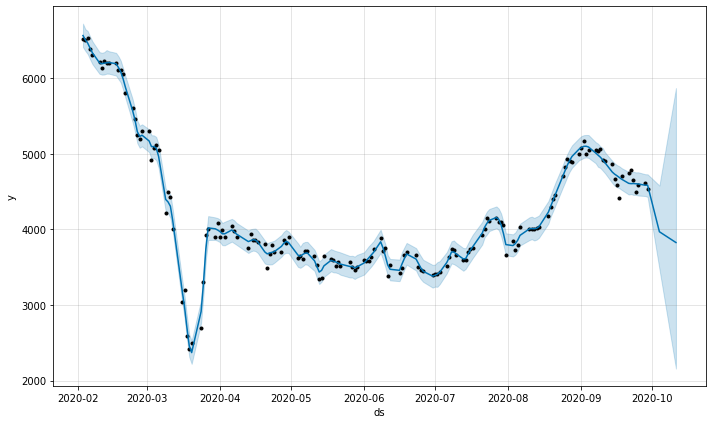

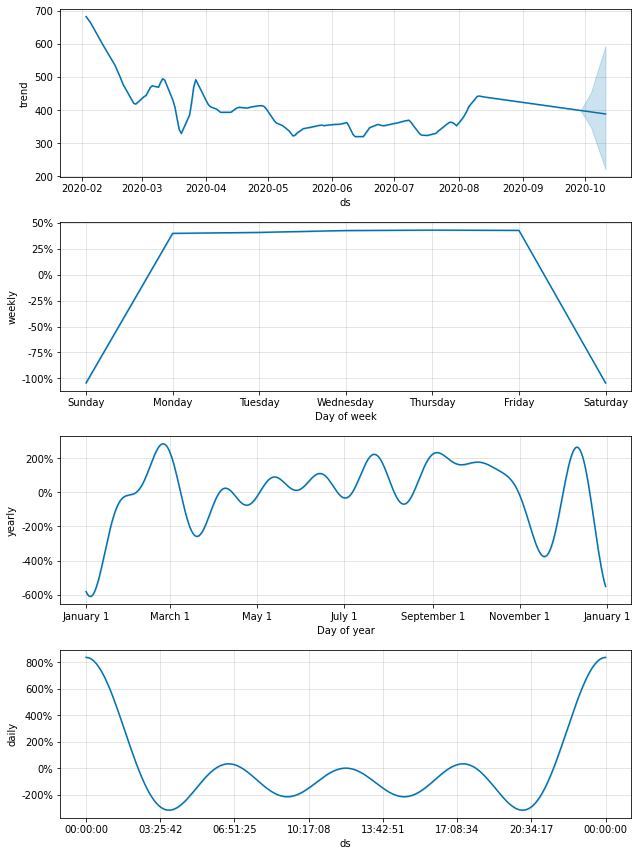

In [ ]:
# Plot results
fig1 = train_model.plot(forecastW) # Plot the fit to past data and future forcast.
fig2 = train_model.plot_components(forecastW) # Plot breakdown of components.
plt.show()
 # Displaying various results.

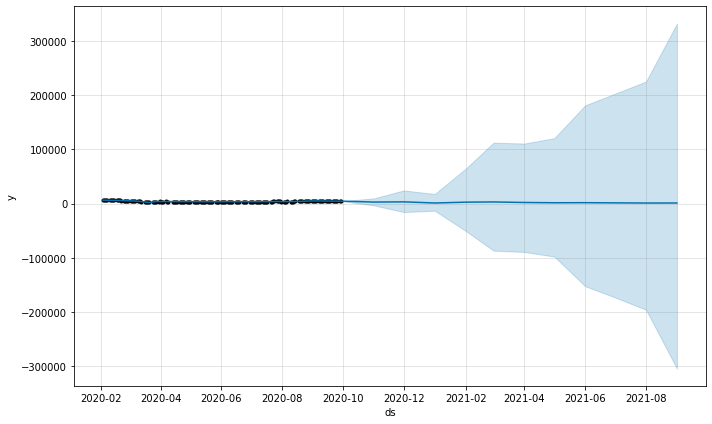

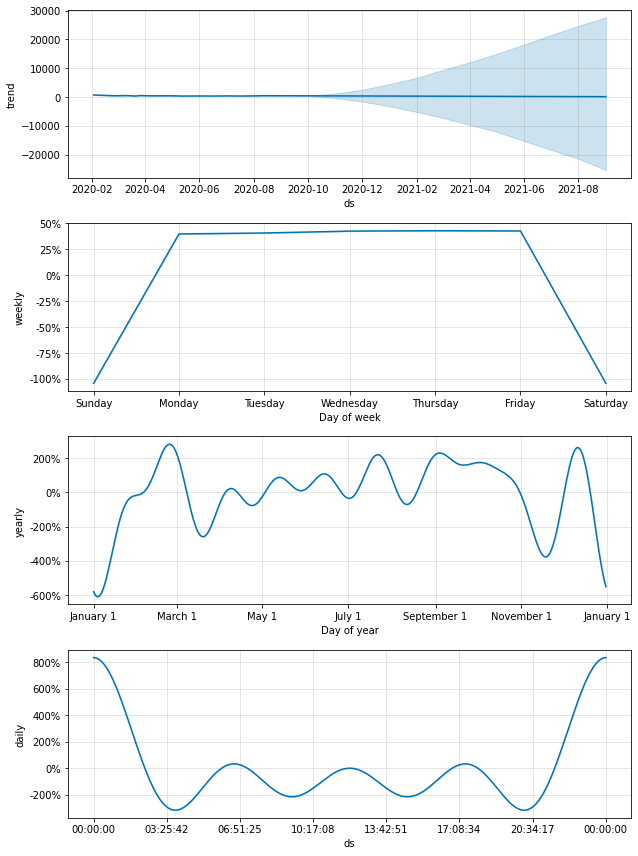

In [ ]:
# Plot results
fig1 = train_model.plot(forecastM) # Plot the fit to past data and future forcast.
fig2 = train_model.plot_components(forecastM) # Plot breakdown of components.
plt.show()
 # Displaying

In [ ]:
#predicted values
X_tst_final= test_model.predict(tsval)

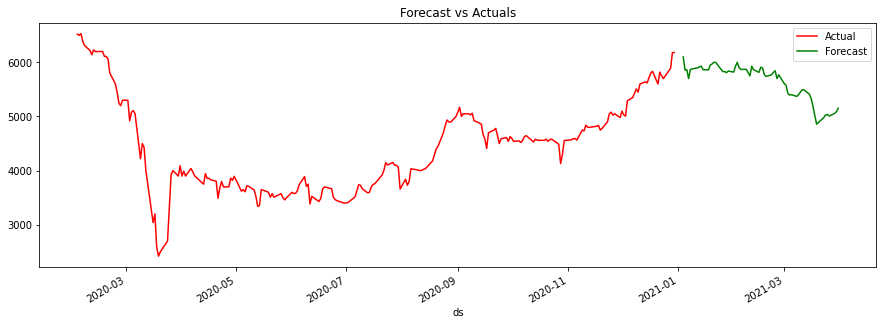

In [ ]:
#plot results
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
ts.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
X_tst_final.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Forecast vs Actuals')
plt.show()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2021-03-01 00:00:00 and 2021-03-21 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 31.
INFO:fbprophet:n_changepoints greater than number of observations. Using 37.
INFO:fbprophet:n_changepoints greater than number of observations. Using 42.


,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,2.646322e+05,514.424155,440.164651,0.079167,0.079167,0.000000
1,2 days,4.347373e+06,2085.035536,2084.976515,0.401156,0.401156,0.000000
2,3 days,1.931261e+07,4394.611690,4370.003644,0.836662,0.836662,0.000000
3,4 days,3.961011e+07,6293.656724,5140.139199,0.980608,1.283087,0.333333
4,5 days,4.874914e+07,6982.058645,5047.964558,1.004390,1.004390,0.500000


,horizon,mse,rmse,mae,mape,mdape,coverage
5,6 days,2.437699e+07,4937.305678,2558.737825,0.508885,0.027856,0.750000
6,7 days,5.635280e+08,23738.744468,16815.911375,3.131846,3.131846,0.500000
7,8 days,1.034017e+09,32156.134171,25400.125591,4.822451,5.475421,0.333333
8,9 days,2.945494e+09,54272.405040,51946.932775,9.759657,9.759657,0.000000
9,10 days,5.354282e+09,73172.962165,69451.827645,12.914366,12.914366,0.000000


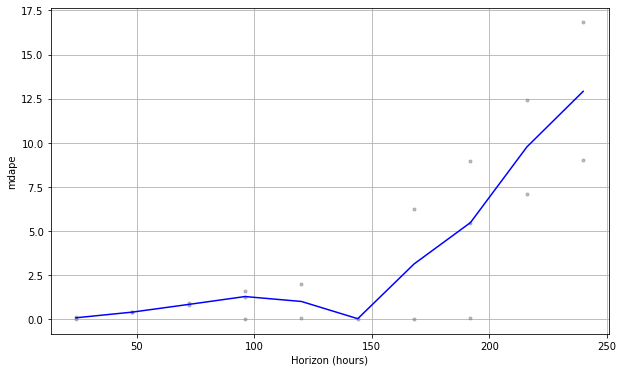

In [ ]:
#accuracy analysis
df_cv = cross_validation(test_model, initial='50 days', period='10 days', horizon = '10 days')
pm = performance_metrics(df_cv, rolling_window=0.1)
display(pm.head(),pm.tail())
fig = plot_cross_validation_metric(df_cv, metric='mdape', rolling_window=0.1)
plt.show()

## Try more models

In [ ]:
model_ARMX = auto_arima(train.y, trace=True, error_action="ignore", suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2613.548, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2610.798, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2611.957, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2612.108, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2609.076, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2612.862, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.996 seconds


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2613.548, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2610.798, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2611.957, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2612.108, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2609.076, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2612.862, Time=0.30 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.349 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1303.538
Date:                Wed, 26 Apr 2023   AIC                           2609.076
Time:                        15:58:33   BIC                           2612.370
Sample:                             0   HQIC                          2610.409
          

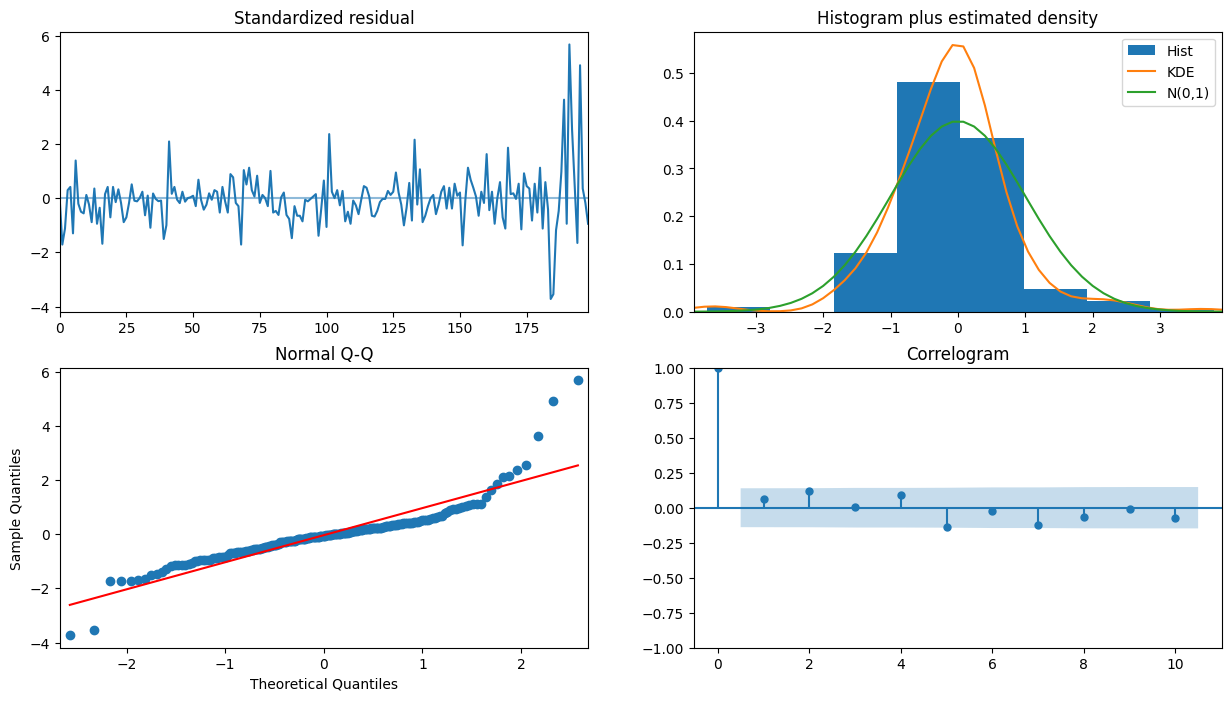

In [ ]:
model_autoARIMA = auto_arima(train.y, 
                      trace=True,
                      suppress_warnings=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
!pip install statsmodels==0.12.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 10.1 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled statsmodels-0.13.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pmdarima 2.0.3 requires statsmodels>=0.13.2, but you have statsmodels 0.12.1 which is incompatible.
plotnine 0.10.1 requires statsmodels>=0.13.2, but you have statsmodels 0.12.1 which is incompatible.


In [ ]:
pip install --upgrade --no-deps statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Build Model
model =  ARIMA(train.y, order=(0,1,0))  
model_fit = model.fit()  
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1303.538
Date:                Wed, 26 Apr 2023   AIC                           2609.076
Time:                        15:59:04   BIC                           2612.370
Sample:                             0   HQIC                          2610.409
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.865e+04   1229.880     23.297      0.000    2.62e+04    3.11e+04
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):               764.68
Prob(Q):                              0.36   Pr

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


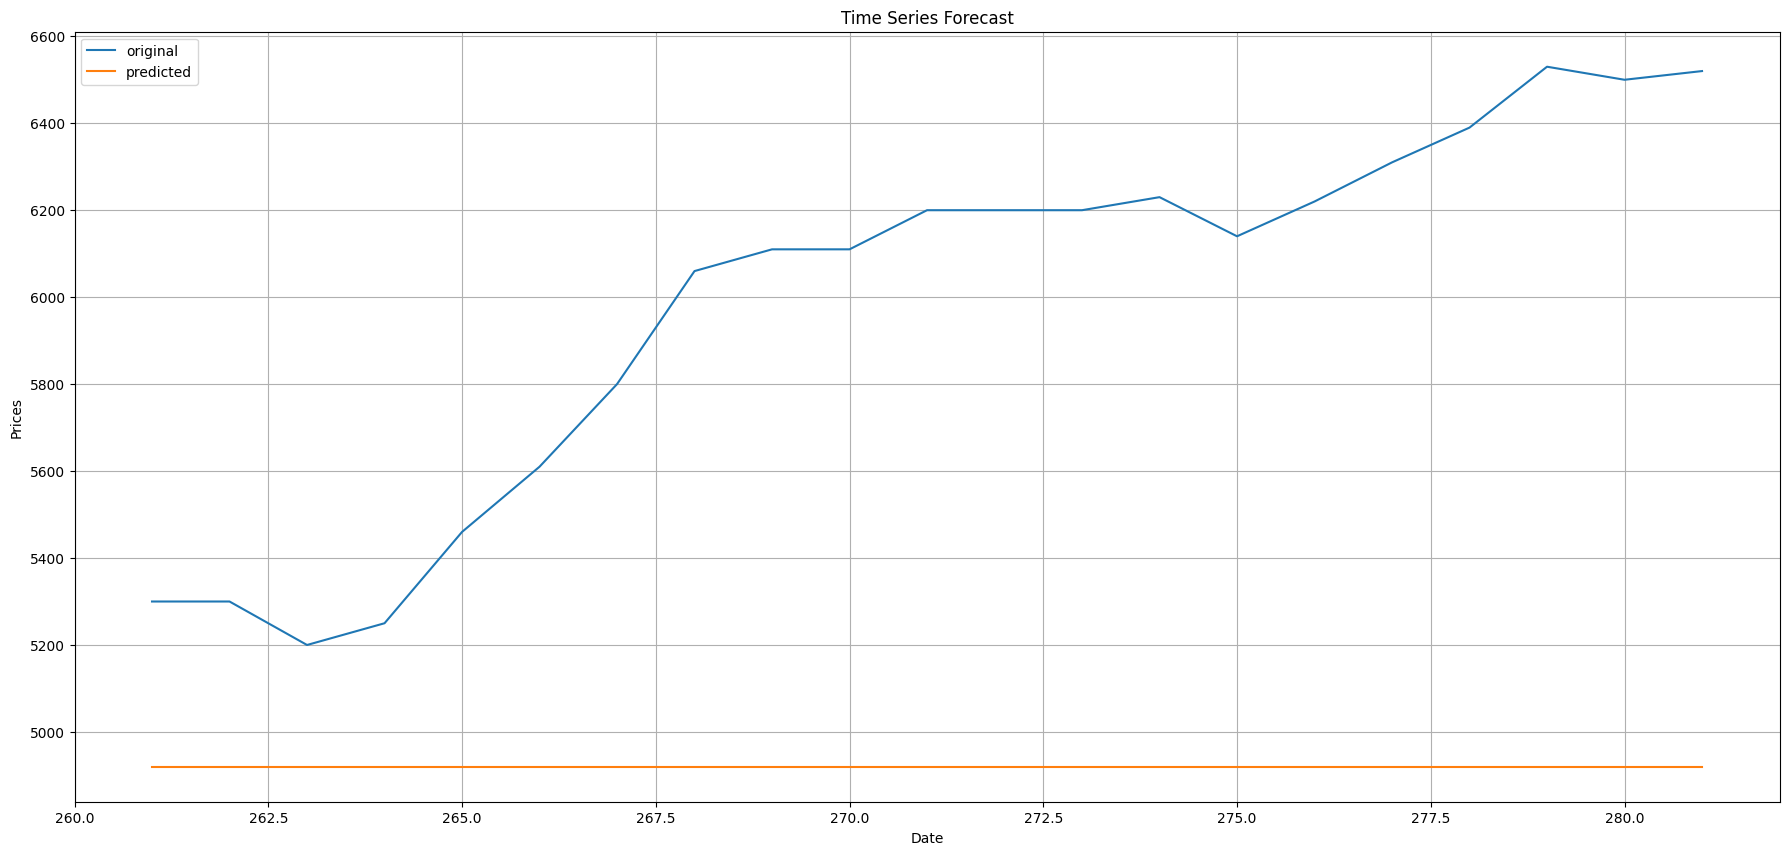

In [ ]:
# predict
#test_data

#start_index = ds(2021, 1, 1)
#end_index = ds(2021, 12, 31)
forecast = model_fit.predict(start=test.index[0], end=test.index[-1])

# visualization
plt.figure(figsize=(22,10))
plt.grid(True)
plt.plot(test.y,label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Prices")
plt.legend()
plt.show()

## ARIMAX

In [ ]:
# add datetime data
df_1_Columbia["month"] = df_1_Columbia.Date.dt.month
df_1_Columbia["week"] = df_1_Columbia.Date.dt.week
df_1_Columbia["day"] = df_1_Columbia.Date.dt.day
df_1_Columbia["day_of_week"] = df_1_Columbia.Date.dt.dayofweek
df_1_Columbia.head()

,Date,Price,Open,High,Low,Vol.,Change %,month,week,day,day_of_week
0,2021-03-31,5150.0,5100.0,5170.0,5100.0,212.44,0.0098,3,13,31,2
1,2021-03-30,5100.0,5010.0,5100.0,5010.0,583.70,0.0109,3,13,30,1
2,2021-03-29,5045.0,5020.0,5045.0,5015.0,117.54,0.0050,3,13,29,0
3,2021-03-26,5020.0,5085.0,5085.0,4980.0,203.46,-0.0020,3,12,26,4
4,2021-03-25,5030.0,5035.0,5045.0,4950.0,317.06,0.0010,3,12,25,3


In [ ]:
#add lagged and exagenous data to a statistical model
df_1_Columbia.reset_index(drop=True, inplace=True)
lag_features = ["Open", "High", "Low", "Vol.", "Change %"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df_1_Columbia[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df_1_Columbia[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df_1_Columbia[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(float)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(float)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(float)

df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(float)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(float)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(float)

for feature in lag_features:
    df_1_Columbia[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df_1_Columbia[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df_1_Columbia[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df_1_Columbia[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df_1_Columbia[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df_1_Columbia[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df_1_Columbia.fillna(df_1_Columbia.mean(), inplace=True)

df_1_Columbia.set_index("Date", drop=False, inplace=True)
df_1_Columbia.head(65)

,Date,Price,Open,High,Low,Vol.,Change %,month,week,day,...,Vol._mean_lag30,Vol._std_lag3,Vol._std_lag7,Vol._std_lag30,Change %_mean_lag3,Change %_mean_lag7,Change %_mean_lag30,Change %_std_lag3,Change %_std_lag7,Change %_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-31,2021-03-31,5150.0,5100.0,5170.0,5100.0,212.44,0.0098,3,13,31,...,291.007986,187.636755,212.380586,230.642997,-0.000255,-0.000141,-0.000019,0.024088,0.027047,0.030584
2021-03-30,2021-03-30,5100.0,5010.0,5100.0,5010.0,583.70,0.0109,3,13,30,...,212.440000,187.636755,212.380586,230.642997,0.009800,0.009800,0.009800,0.024088,0.027047,0.030584
2021-03-29,2021-03-29,5045.0,5020.0,5045.0,5015.0,117.54,0.0050,3,13,29,...,398.070000,262.520464,262.520464,262.520464,0.010350,0.010350,0.010350,0.000778,0.000778,0.000778
2021-03-26,2021-03-26,5020.0,5085.0,5085.0,4980.0,203.46,-0.0020,3,12,26,...,304.560000,246.355144,246.355144,246.355144,0.008567,0.008567,0.008567,0.003137,0.003137,0.003137
2021-03-25,2021-03-25,5030.0,5035.0,5045.0,4950.0,317.06,0.0010,3,12,25,...,279.285000,248.082597,207.402686,207.402686,0.004633,0.005925,0.005925,0.006458,0.005872,0.005872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-04,2021-01-04,6100.0,6110.0,6160.0,5900.0,454.99,-0.0129,1,1,4,...,299.014667,100.635038,122.452751,194.277794,-0.022167,-0.003800,-0.000943,0.020746,0.022951,0.015140
2020-12-30,2020-12-30,6180.0,6180.0,6275.0,6020.0,651.79,0.0000,12,53,30,...,300.550000,67.575001,122.777626,195.355395,-0.017100,-0.006000,-0.001917,0.020426,0.022984,0.014931
2020-12-29,2020-12-29,6180.0,5900.0,6180.0,5900.0,876.72,0.0492,12,53,29,...,318.844667,113.038238,156.580406,201.804883,-0.017400,-0.006357,-0.001633,0.020033,0.022849,0.014882


In [ ]:
#train split

df_train = df_1_Columbia[df_1_Columbia.index < pd.to_datetime('2021-01-01', format="%Y-%m-%d")]
df_train=df_train.dropna()
df_train

,Date,Price,Open,High,Low,Vol.,Change %,month,week,day,...,Vol._mean_lag30,Vol._std_lag3,Vol._std_lag7,Vol._std_lag30,Change %_mean_lag3,Change %_mean_lag7,Change %_mean_lag30,Change %_std_lag3,Change %_std_lag7,Change %_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-30,2020-12-30,6180.0,6180.0,6275.0,6020.0,651.79,0.0000,12,53,30,...,300.550000,67.575001,122.777626,195.355395,-0.017100,-0.006000,-0.001917,0.020426,0.022984,0.014931
2020-12-29,2020-12-29,6180.0,5900.0,6180.0,5900.0,876.72,0.0492,12,53,29,...,318.844667,113.038238,156.580406,201.804883,-0.017400,-0.006357,-0.001633,0.020033,0.022849,0.014882
2020-12-28,2020-12-28,5890.0,5705.0,5890.0,5705.0,339.87,0.0333,12,53,28,...,343.963000,211.021301,229.258093,222.450266,0.012100,-0.000057,0.000373,0.032771,0.031118,0.017418
2020-12-24,2020-12-24,5700.0,5780.0,5780.0,5700.0,10.42,-0.0087,12,52,24,...,350.166000,269.597080,190.762943,219.539673,0.027500,0.000443,0.000440,0.025108,0.031700,0.017544
2020-12-23,2020-12-23,5750.0,5870.0,5890.0,5720.0,527.28,-0.0120,12,52,23,...,334.894667,437.268208,270.958123,226.833234,0.024600,0.003214,0.000493,0.029914,0.029565,0.017513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-10,2020-01-10,6770.0,6780.0,6890.0,6720.0,227.47,-0.0059,1,2,10,...,375.139667,121.183716,168.102671,257.912339,-0.009900,-0.002271,-0.005070,0.006620,0.011418,0.012046
2020-01-09,2020-01-09,6810.0,6880.0,6890.0,6800.0,262.89,-0.0102,1,2,9,...,382.684333,133.204733,171.370307,249.776445,-0.008367,-0.001414,-0.003837,0.006937,0.010783,0.009706
2020-01-08,2020-01-08,6880.0,6940.0,6950.0,6880.0,84.93,-0.0101,1,2,8,...,369.821667,115.844517,117.757371,245.500583,-0.010767,-0.004586,-0.003903,0.005173,0.009349,0.009744


In [ ]:
#validation split
#df_valid = dfRus[dfRus["Date"].isin(pd.date_range('2021-01-04', '2021-03-31'))]
df_valid = df_1_Columbia[df_1_Columbia["Date"].isin(pd.date_range('2021-01-04', '2021-03-31'))]
#df_valid=df_valid.dropna()
df_valid

,Date,Price,Open,High,Low,Vol.,Change %,month,week,day,...,Vol._mean_lag30,Vol._std_lag3,Vol._std_lag7,Vol._std_lag30,Change %_mean_lag3,Change %_mean_lag7,Change %_mean_lag30,Change %_std_lag3,Change %_std_lag7,Change %_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-31,2021-03-31,5150.0,5100.0,5170.0,5100.0,212.44,0.0098,3,13,31,...,291.007986,187.636755,212.380586,230.642997,-0.000255,-0.000141,-0.000019,0.024088,0.027047,0.030584
2021-03-30,2021-03-30,5100.0,5010.0,5100.0,5010.0,583.70,0.0109,3,13,30,...,212.440000,187.636755,212.380586,230.642997,0.009800,0.009800,0.009800,0.024088,0.027047,0.030584
2021-03-29,2021-03-29,5045.0,5020.0,5045.0,5015.0,117.54,0.0050,3,13,29,...,398.070000,262.520464,262.520464,262.520464,0.010350,0.010350,0.010350,0.000778,0.000778,0.000778
2021-03-26,2021-03-26,5020.0,5085.0,5085.0,4980.0,203.46,-0.0020,3,12,26,...,304.560000,246.355144,246.355144,246.355144,0.008567,0.008567,0.008567,0.003137,0.003137,0.003137
2021-03-25,2021-03-25,5030.0,5035.0,5045.0,4950.0,317.06,0.0010,3,12,25,...,279.285000,248.082597,207.402686,207.402686,0.004633,0.005925,0.005925,0.006458,0.005872,0.005872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-08,2021-01-08,5870.0,5805.0,5870.0,5790.0,154.80,0.0298,1,1,8,...,273.467667,22.977002,168.214258,197.604037,0.003367,0.002429,-0.000510,0.001501,0.007829,0.011676
2021-01-07,2021-01-07,5700.0,5860.0,5985.0,5700.0,539.18,-0.0281,1,1,7,...,263.475333,152.589061,159.841010,195.700499,0.012467,0.006200,0.000310,0.015067,0.013016,0.012891
2021-01-06,2021-01-06,5865.0,5860.0,5955.0,5860.0,338.98,0.0009,1,1,6,...,278.989667,195.079498,173.271818,198.568879,0.002267,-0.000014,-0.000453,0.029054,0.017502,0.013870


In [ ]:
exogenous_features=df_1_Columbia.columns[6:].values.tolist()

In [ ]:
exogenous_features

['month',
 'week',
 'day',
 'day_of_week',
 'Open_mean_lag3',
 'Open_mean_lag7',
 'Open_mean_lag30',
 'Open_std_lag3',
 'Open_std_lag7',
 'Open_std_lag30',
 'High_mean_lag3',
 'High_mean_lag7',
 'High_mean_lag30',
 'High_std_lag3',
 'High_std_lag7',
 'High_std_lag30',
 'Low_mean_lag3',
 'Low_mean_lag7',
 'Low_mean_lag30',
 'Low_std_lag3',
 'Low_std_lag7',
 'Low_std_lag30',
 'Vol._mean_lag3',
 'Vol._mean_lag7',
 'Vol._mean_lag30',
 'Vol._std_lag3',
 'Vol._std_lag7',
 'Vol._std_lag30',
 'Change %_mean_lag3',
 'Change %_mean_lag7',
 'Change %_mean_lag30',
 'Change %_std_lag3',
 'Change %_std_lag7',
 'Change %_std_lag30']

In [ ]:
#Train model
model_arimax = auto_arima(df_train.Price, exogenous=df_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=3112.841, Time=0.85 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3254.435, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=3182.039, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=3112.990, Time=0.07 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=3115.465, Time=0.24 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=3114.116, Time=0.25 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=3114.781, Time=0.56 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=3112.802, Time=0.73 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=3112.477, Time=0.28 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=3114.609, Time=0.31 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=3114.042, Time=0.53 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=3114.297, Time=0.16 sec
 ARIMA(0,2,4)(0,0,0)[0]             : AIC=3116.589, Time=0.38 sec
 ARIMA(2,2,4)(0,0,0)[0]             : AIC=3114.257, Time=0.84 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept

In [ ]:
model_arimax.fit(df_train.Price, exogenous=df_train[exogenous_features])

ARIMA(order=(1, 2, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
#forcast data
##end_index = ds(2021, 12, 31)
#forecast = model_fit.predict(start=test.index[0], end=test.index[-1])
forecast_Values = model_arimax.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
df_valid["Forecast_ARIMAX"]= forecast_Values

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
forecast_Values.reset_index(drop=True, inplace=True)

In [ ]:
indexVal=df_1_Columbia["Date"].values.tolist()
indexVal

In [ ]:
list(forecast_Values)

[7030.786373699937,
 7068.3168786015285,
 7099.817334705473,
 7136.253229903051,
 7168.649595759427,
 7204.352211979521,
 7237.348747727297,
 7272.560140402733,
 7305.9587299260875,
 7340.841051977334,
 7374.5089773017235,
 7409.170854960836,
 7443.019208322779,
 7477.533410296334,
 7511.502632390212,
 7545.9179064305445,
 7579.968098480963,
 7614.317100704544,
 7648.421534524172,
 7682.726141261539,
 7716.866911639226,
 7751.141777842943,
 7785.306890078776,
 7819.56183310072,
 7853.743251945917,
 7887.984848429541,
 7922.177191071411,
 7956.409846709786,
 7990.6095072024145,
 8024.836173369074,
 8059.040736089503,
 8093.263389909406,
 8127.471236631957,
 8161.691202580999,
 8195.90124925638,
 8230.119414600887,
 8264.330935024544,
 8298.547894144178,
 8332.760401831718,
 8366.97655290138,
 8401.18972195694,
 8435.405331713971,
 8469.618943819927,
 8503.834190951658,
 8538.04809985705,
 8572.263104066113,
 8606.477211797428,
 8640.692053272613,
 8674.906294197404,
 8709.12102665717,
 

In [ ]:
forecast_Values.values()

251    20.3
252    20.3
253    20.3
254    20.3
255    20.3
       ... 
309    20.3
310    20.3
311    20.3
312    20.3
313    20.3
Length: 63, dtype: float64

In [ ]:
df_valid["Forecast_ARIMAX"]= list(forecast_Values)

In [ ]:
df_valid

,Date,Price,Open,High,Low,Vol.,Change %,month,week,day,...,Vol._std_lag3,Vol._std_lag7,Vol._std_lag30,Change %_mean_lag3,Change %_mean_lag7,Change %_mean_lag30,Change %_std_lag3,Change %_std_lag7,Change %_std_lag30,Forecast_ARIMAX
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-31,2021-03-31,5150.0,5100.0,5170.0,5100.0,212.44,0.0098,3,13,31,...,187.636755,212.380586,230.642997,-0.000255,-0.000141,-0.000019,0.024088,0.027047,0.030584,7030.786374
2021-03-30,2021-03-30,5100.0,5010.0,5100.0,5010.0,583.70,0.0109,3,13,30,...,187.636755,212.380586,230.642997,0.009800,0.009800,0.009800,0.024088,0.027047,0.030584,7068.316879
2021-03-29,2021-03-29,5045.0,5020.0,5045.0,5015.0,117.54,0.0050,3,13,29,...,262.520464,262.520464,262.520464,0.010350,0.010350,0.010350,0.000778,0.000778,0.000778,7099.817335
2021-03-26,2021-03-26,5020.0,5085.0,5085.0,4980.0,203.46,-0.0020,3,12,26,...,246.355144,246.355144,246.355144,0.008567,0.008567,0.008567,0.003137,0.003137,0.003137,7136.253230
2021-03-25,2021-03-25,5030.0,5035.0,5045.0,4950.0,317.06,0.0010,3,12,25,...,248.082597,207.402686,207.402686,0.004633,0.005925,0.005925,0.006458,0.005872,0.005872,7168.649596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-08,2021-01-08,5870.0,5805.0,5870.0,5790.0,154.80,0.0298,1,1,8,...,22.977002,168.214258,197.604037,0.003367,0.002429,-0.000510,0.001501,0.007829,0.011676,8948.622481
2021-01-07,2021-01-07,5700.0,5860.0,5985.0,5700.0,539.18,-0.0281,1,1,7,...,152.589061,159.841010,195.700499,0.012467,0.006200,0.000310,0.015067,0.013016,0.012891,8982.837037
2021-01-06,2021-01-06,5865.0,5860.0,5955.0,5860.0,338.98,0.0009,1,1,6,...,195.079498,173.271818,198.568879,0.002267,-0.000014,-0.000453,0.029054,0.017502,0.013870,9017.051512


In [ ]:
df_validNew=df_valid.copy()

In [ ]:
df_valid["Forecast_ARIMAX"]=forecast_Values

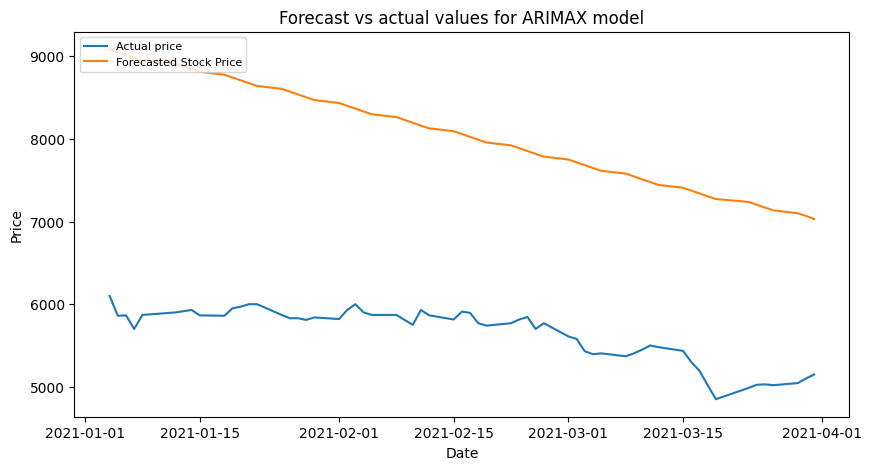

In [ ]:
#Plot predicted vs actual prices
plt.figure(figsize=(10,5), dpi=100)
plt.plot(df_valid.Price, label='Actual price')
plt.plot(df_valid["Forecast_ARIMAX"], label='Forecasted Stock Price')
plt.title('Forecast vs actual values for ARIMAX model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Uisng Bollinger Bands 

In [ ]:
current_df = filtered_df.set_index('Date')

In [ ]:
#validations set
validationdf = df_1_Columbia[:61]


In [ ]:
def get_sma(prices, rate):
    return prices.rolling(rate).mean()

In [ ]:

closing_prices = current_df['Price'] # Use only closing prices

In [ ]:
#validations set
closingpricesval =  validationdf['Price'] # Use only closing prices

In [ ]:
sma = get_sma(closing_prices, 20) # Get 20 day SMA

In [ ]:
#validations set
smaval = get_sma(closingpricesval, 20) # Get 20 day SMA

In [ ]:
symbol = ' SA'

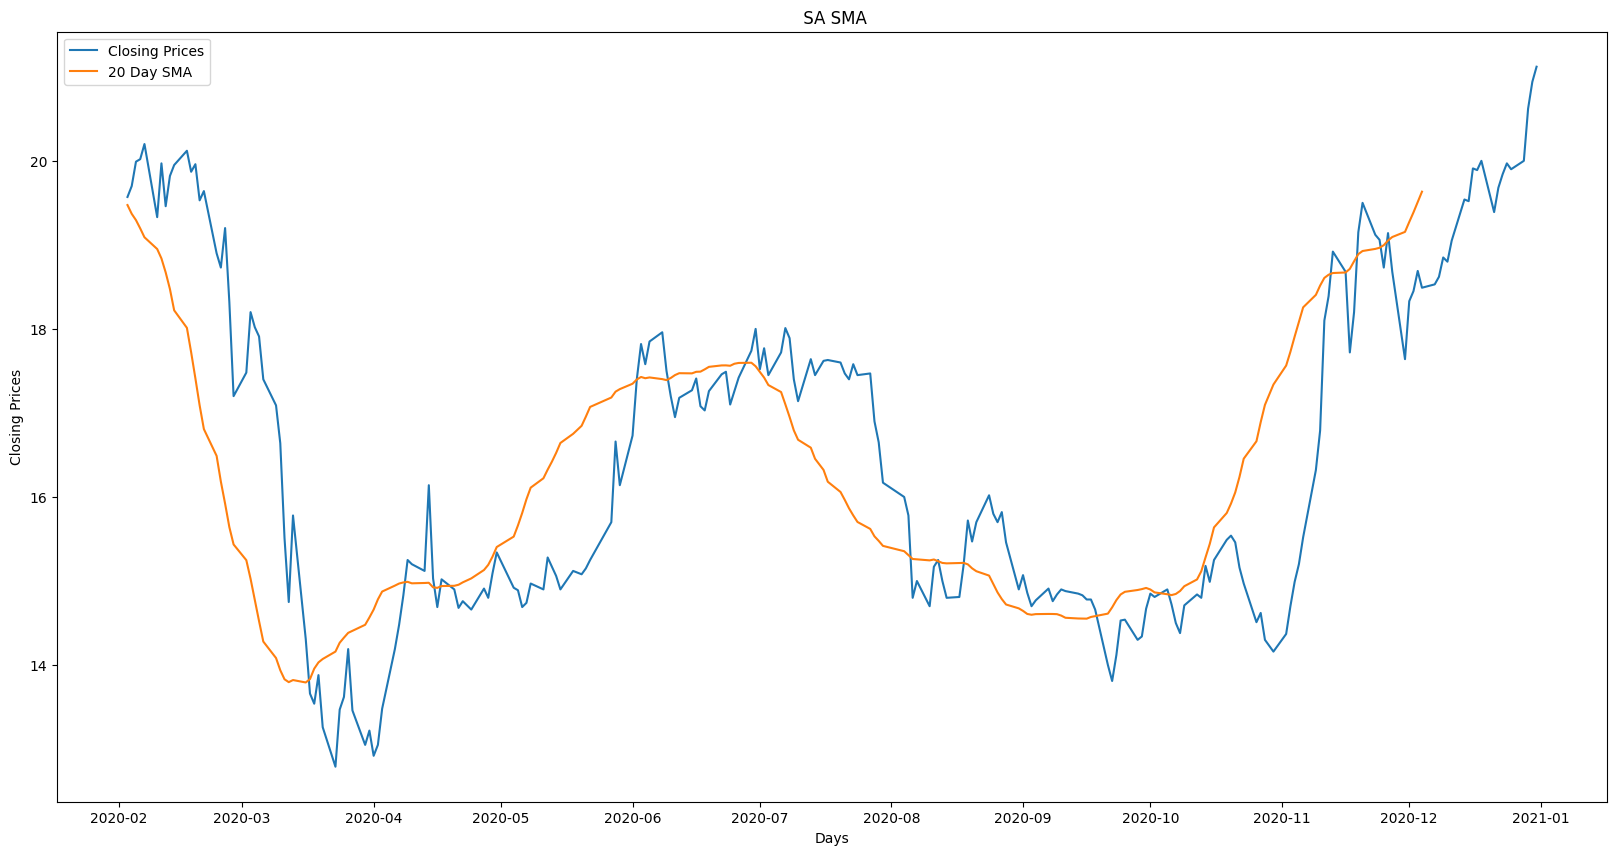

In [ ]:
# Plot the data
plt.rcParams["figure.figsize"] = (20,10)
plt.title(symbol + ' SMA')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(closing_prices, label='Closing Prices')
plt.plot(sma, label='20 Day SMA')
plt.legend()
plt.show()

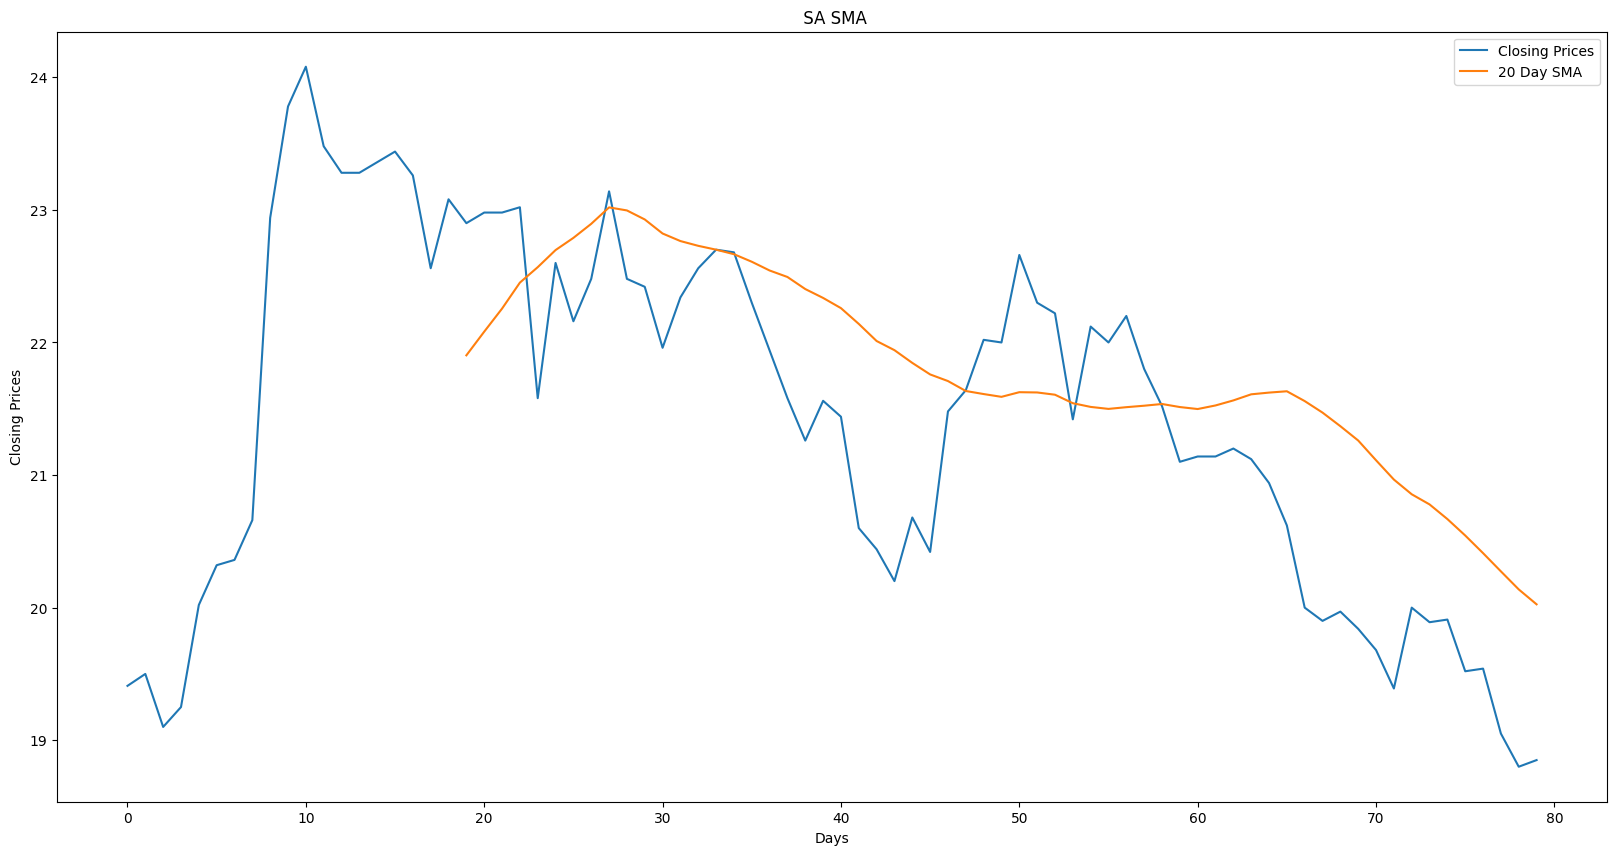

In [ ]:
# Plot the data
plt.rcParams["figure.figsize"] = (20,10)
plt.title(symbol + ' SMA')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(closingpricesval, label='Closing Prices')
plt.plot(smaval, label='20 Day SMA')
plt.legend()
plt.show()

In [ ]:
def get_bollinger_bands(prices, sma, rate=20):
    sma = get_sma(prices, rate)
    std = prices.rolling(rate).std()
    bollinger_up = sma + std * 2 # Calculate top band
    bollinger_down = sma - std * 2 # Calculate bottom band
    return bollinger_up, bollinger_down

In [ ]:
bollinger_up, bollinger_down = get_bollinger_bands(closing_prices, sma)

In [ ]:
#validations set
bollinger_upval, bollinger_downval = get_bollinger_bands(closingpricesval, smaval)

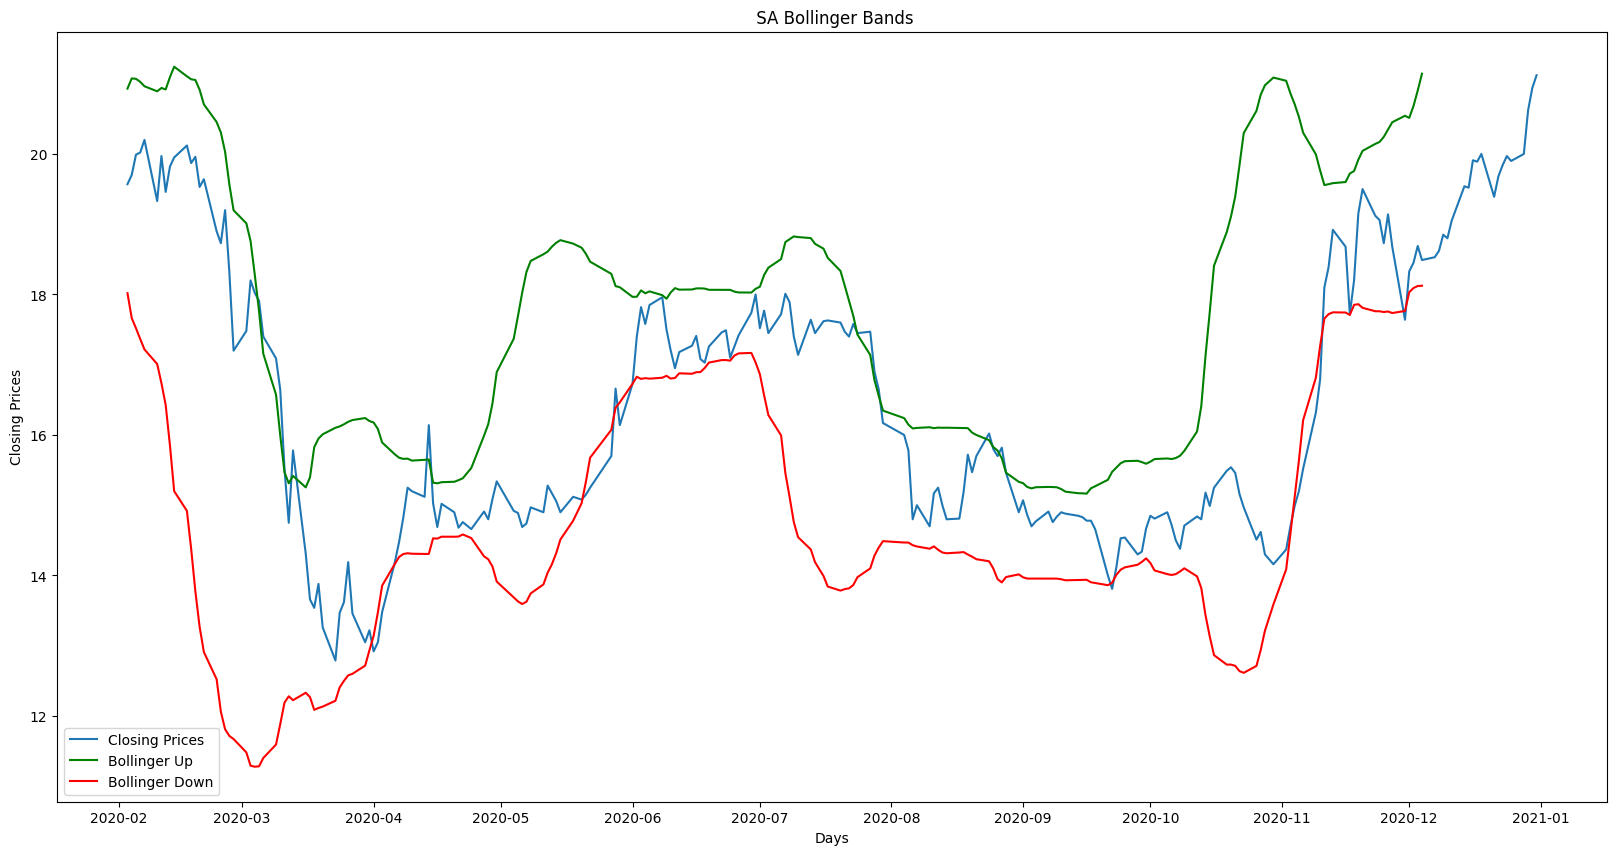

In [ ]:
#plot results
plt.rcParams["figure.figsize"] = (20,10)
plt.title(symbol + ' Bollinger Bands')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(closing_prices, label='Closing Prices')
plt.plot(bollinger_up, label='Bollinger Up', c='g')
plt.plot(bollinger_down, label='Bollinger Down', c='r')
plt.legend()
plt.show()

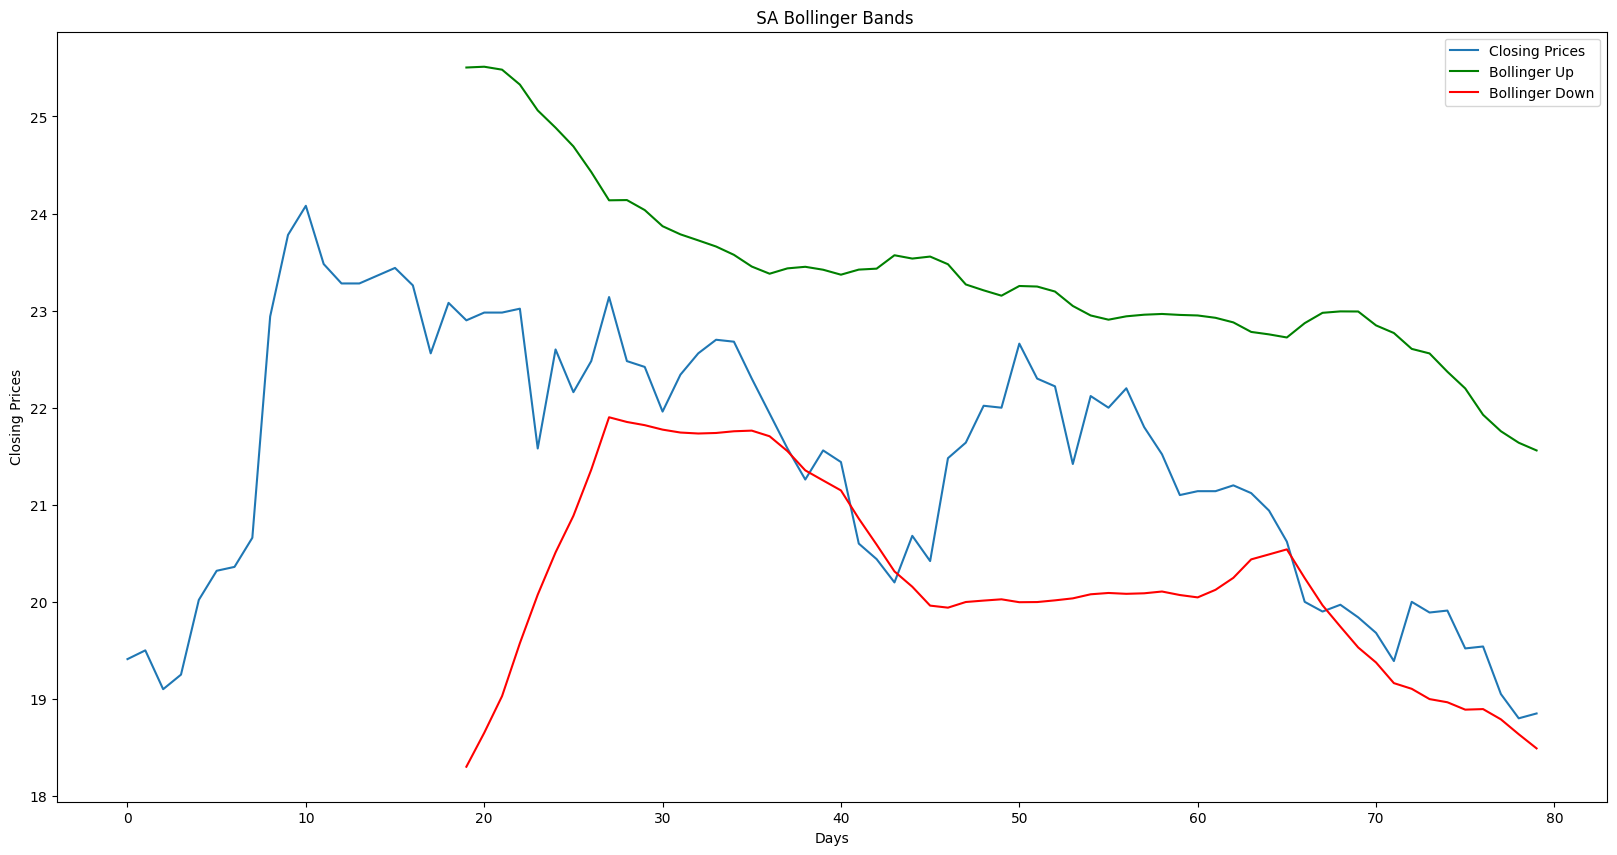

In [ ]:
#plot results
plt.rcParams["figure.figsize"] = (20,10)
plt.title(symbol + ' Bollinger Bands')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(closingpricesval, label='Closing Prices')
plt.plot(bollinger_upval, label='Bollinger Up', c='g')
plt.plot(bollinger_downval, label='Bollinger Down', c='r')
plt.legend()
plt.show()

In [ ]:
current_df['sma_20'] = get_sma(current_df['Price'], 20)
current_df.tail()

,Price,Open,High,Low,Vol.,Change %,sma_20
Date,,,,,,,
2020-02-07,6310.0,6360.0,6360.0,6280.0,400.12,-0.0125,5740.5
2020-02-06,6390.0,6530.0,6540.0,6360.0,622.79,-0.0214,5804.5
2020-02-05,6530.0,6590.0,6590.0,6510.0,584.24,0.0046,5877.0
2020-02-04,6500.0,6530.0,6570.0,6500.0,469.99,-0.0031,5956.0
2020-02-03,6520.0,6630.0,6630.0,6520.0,80.97,0.0031,6017.0


In [ ]:
current_df['upper_bb'], current_df['lower_bb'] = get_bollinger_bands(current_df['Price'], current_df['sma_20'], 20)
current_df.tail()

,Price,Open,High,Low,Vol.,Change %,sma_20,upper_bb,lower_bb
Date,,,,,,,,,
2020-02-07,6310.0,6360.0,6360.0,6280.0,400.12,-0.0125,5740.5,6712.648462,4768.351538
2020-02-06,6390.0,6530.0,6540.0,6360.0,622.79,-0.0214,5804.5,6770.391462,4838.608538
2020-02-05,6530.0,6590.0,6590.0,6510.0,584.24,0.0046,5877.0,6831.526060,4922.473940
2020-02-04,6500.0,6530.0,6570.0,6500.0,469.99,-0.0031,5956.0,6835.626715,5076.373285
2020-02-03,6520.0,6630.0,6630.0,6520.0,80.97,0.0031,6017.0,6873.998434,5160.001566


In [ ]:
#validations set
validationdf['sma_20'] = get_sma(validationdf['Price'], 20)
validationdf.tail()

,Date,Price,Open,High,Low,Vol.,Change %,month,week,day,...,Vol._std_lag3,Vol._std_lag7,Vol._std_lag30,Change %_mean_lag3,Change %_mean_lag7,Change %_mean_lag30,Change %_std_lag3,Change %_std_lag7,Change %_std_lag30,sma_20
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-08,2021-01-08,5870.0,5805.0,5870.0,5790.0,154.80,0.0298,1,1,8,...,22.977002,168.214258,197.604037,0.003367,0.002429,-0.000510,0.001501,0.007829,0.011676,5898.00
2021-01-07,2021-01-07,5700.0,5860.0,5985.0,5700.0,539.18,-0.0281,1,1,7,...,152.589061,159.841010,195.700499,0.012467,0.006200,0.000310,0.015067,0.013016,0.012891,5889.50
2021-01-06,2021-01-06,5865.0,5860.0,5955.0,5860.0,338.98,0.0009,1,1,6,...,195.079498,173.271818,198.568879,0.002267,-0.000014,-0.000453,0.029054,0.017502,0.013870,5887.75
2021-01-05,2021-01-05,5860.0,6000.0,6000.0,5860.0,457.03,-0.0393,1,1,5,...,192.245631,137.222093,197.424153,0.000867,0.000243,0.000283,0.028950,0.017500,0.013305,5880.75
2021-01-04,2021-01-04,6100.0,6110.0,6160.0,5900.0,454.99,-0.0129,1,1,4,...,100.635038,122.452751,194.277794,-0.022167,-0.003800,-0.000943,0.020746,0.022951,0.015140,5889.25


In [ ]:
#validations set
validationdf['upper_bb'], validationdf['lower_bb'] = get_bollinger_bands(validationdf['Price'], validationdf['sma_20'], 20)
validationdf.tail()

,Date,Price,Open,High,Low,Vol.,Change %,month,week,day,...,Vol._std_lag30,Change %_mean_lag3,Change %_mean_lag7,Change %_mean_lag30,Change %_std_lag3,Change %_std_lag7,Change %_std_lag30,sma_20,upper_bb,lower_bb
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-08,2021-01-08,5870.0,5805.0,5870.0,5790.0,154.80,0.0298,1,1,8,...,197.604037,0.003367,0.002429,-0.000510,0.001501,0.007829,0.011676,5898.00,6021.773988,5774.226012
2021-01-07,2021-01-07,5700.0,5860.0,5985.0,5700.0,539.18,-0.0281,1,1,7,...,195.700499,0.012467,0.006200,0.000310,0.015067,0.013016,0.012891,5889.50,6041.500693,5737.499307
2021-01-06,2021-01-06,5865.0,5860.0,5955.0,5860.0,338.98,0.0009,1,1,6,...,198.568879,0.002267,-0.000014,-0.000453,0.029054,0.017502,0.013870,5887.75,6040.047320,5735.452680
2021-01-05,2021-01-05,5860.0,6000.0,6000.0,5860.0,457.03,-0.0393,1,1,5,...,197.424153,0.000867,0.000243,0.000283,0.028950,0.017500,0.013305,5880.75,6023.919940,5737.580060
2021-01-04,2021-01-04,6100.0,6110.0,6160.0,5900.0,454.99,-0.0129,1,1,4,...,194.277794,-0.022167,-0.003800,-0.000943,0.020746,0.022951,0.015140,5889.25,6061.885149,5716.614851


Creating crosspoints of bollinger bands for "buy" and "sell" decisions.

In [ ]:
buyers = current_df[current_df['Price'] <= current_df['lower_bb']]
sellers = current_df[current_df['Price'] >= current_df['upper_bb']]

In [ ]:
#validations set
buyersval = validationdf[validationdf['Price'] <= validationdf['lower_bb']]
sellersval = validationdf[validationdf['Price'] >= validationdf['upper_bb']]

Bollinger Bands of a Validation Set( For Predictions)

In [ ]:
# Plotting

import plotly.io as pio
import plotly.graph_objects as go

pio.templates.default = "plotly_white"

fig = go.Figure()
fig.add_trace(go.Scatter(x=bollinger_downval.index, 
                         y=validationdf['lower_bb'], 
                         name='Lower Band', 
                         line_color='rgba(173,204,255,0.2)'
                        ))
fig.add_trace(go.Scatter(x=bollinger_upval.index, 
                         y=validationdf['upper_bb'], 
                         name='Upper Band', 
                         fill='tonexty', 
                         fillcolor='rgba(173,204,255,0.2)', 
                         line_color='rgba(173,204,255,0.2)'
                        ))
fig.add_trace(go.Scatter(x=validationdf.index, 
                         y=validationdf['Price'], 
                         name='Price', 
                         line_color='#636EFA'
                        ))

fig.add_trace(go.Scatter(x=buyersval.index, 
                         y=buyersval['Price'], 
                         name='Buyers', 
                         mode='markers',
                         marker=dict(
                             color='#00CC96',
                             size=10,
                             )
                         ))
fig.add_trace(go.Scatter(x=sellersval.index, 
                         y=sellersval['Price'], 
                         name='Sellers', 
                         mode='markers', 
                         marker=dict(
                             color='#EF553B',
                             size=10,
                             )
                         ))
fig.show()

## LSTM model to improve the performance of stock price prediction

In [ ]:
#input data
x = current_df.Open
y = current_df.Price

In [ ]:
#train and test split data
trainxx, testxx = x[0:int(0.725*(len(x)))], x[int(0.725*(len(x))):]
trainy, testy = y[0:int(0.725*(len(y)))], y[int(0.725*(len(y))):]
trainvalue = np.array(list(zip(trainxx,trainy)))
testvalue = np.array(list(zip(trainxx,trainy)))

In [ ]:
def create_dataset(n_X, look_back):
  dataX, dataY = [], []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 1
trainxx, trainy = create_dataset(trainvalue, look_back)
testxx,testy = create_dataset(testvalue, look_back)

trainxx = np.reshape(trainxx, (trainxx.shape[0], 1, 2))
testxx = np.reshape(testxx, (testxx.shape[0], 1, 2))

In [ ]:
#train a model
lstmmodel = Sequential()
lstmmodel.add(LSTM(256, activation = 'relu' ,  input_shape = (trainxx.shape[1], 2)))
lstmmodel.add(Dense(1))
lstmmodel.compile(loss = 'mean_squared_error', optimizer = 'adam')
lstmmodel.fit(trainxx, trainy, epochs = 200, batch_size = 10, verbose = 2, shuffle = False)

Epoch 1/200
16/16 - 3s - loss: 17647010.0000 - 3s/epoch - 183ms/step
Epoch 2/200
16/16 - 0s - loss: 13922729.0000 - 173ms/epoch - 11ms/step
Epoch 3/200
16/16 - 0s - loss: 9850188.0000 - 192ms/epoch - 12ms/step
Epoch 4/200
16/16 - 0s - loss: 5961325.5000 - 181ms/epoch - 11ms/step
Epoch 5/200
16/16 - 0s - loss: 2769766.2500 - 183ms/epoch - 11ms/step
Epoch 6/200
16/16 - 0s - loss: 835237.2500 - 186ms/epoch - 12ms/step
Epoch 7/200
16/16 - 0s - loss: 122518.6328 - 190ms/epoch - 12ms/step
Epoch 8/200
16/16 - 0s - loss: 12600.4355 - 152ms/epoch - 10ms/step
Epoch 9/200
16/16 - 0s - loss: 14027.1982 - 139ms/epoch - 9ms/step
Epoch 10/200
16/16 - 0s - loss: 12630.0020 - 142ms/epoch - 9ms/step
Epoch 11/200
16/16 - 0s - loss: 11591.4229 - 147ms/epoch - 9ms/step
Epoch 12/200
16/16 - 0s - loss: 11465.7295 - 149ms/epoch - 9ms/step
Epoch 13/200
16/16 - 0s - loss: 11431.5576 - 146ms/epoch - 9ms/step
Epoch 14/200
16/16 - 0s - loss: 11434.8018 - 140ms/epoch - 9ms/step
Epoch 15/200
16/16 - 0s - loss: 11444

In [ ]:
#lstm predict
lstmpredict = lstmmodel.predict(testxx)

5/5 [==============================] - 0s 8ms/step


In [ ]:
#real price
real_stock_price = current_df.Price[:159].values

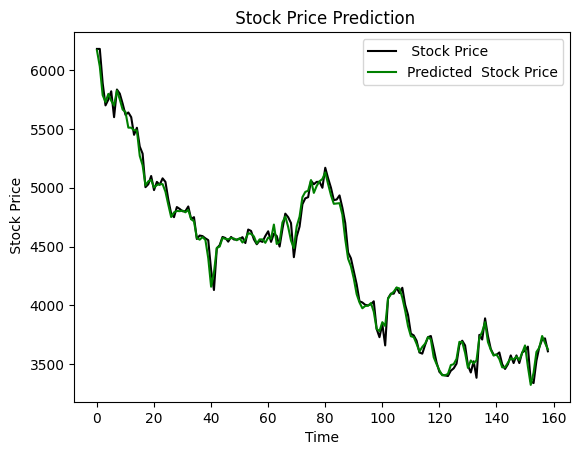

In [ ]:
#plot results
plt.plot(real_stock_price, color = 'black', label = ' Stock Price')
plt.plot(lstmpredict, color = 'green', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

Sliceddf for converging current df and predictions.

In [ ]:
sliceddf = current_df[:159]

In [ ]:
sliceddf['PredictedLSTM'] = lstmpredict

In [ ]:
sliceddf.head()

,Price,Open,High,Low,Vol.,Change %,sma_20,upper_bb,lower_bb,PredictedLSTM
Date,,,,,,,,,,
2020-12-30,6180.0,6180.0,6275.0,6020.0,651.79,0.0000,NaN,NaN,NaN,6168.114746
2020-12-29,6180.0,5900.0,6180.0,5900.0,876.72,0.0492,NaN,NaN,NaN,6030.272949
2020-12-28,5890.0,5705.0,5890.0,5705.0,339.87,0.0333,NaN,NaN,NaN,5787.629883
2020-12-24,5700.0,5780.0,5780.0,5700.0,10.42,-0.0087,NaN,NaN,NaN,5728.473633
2020-12-23,5750.0,5870.0,5890.0,5720.0,527.28,-0.0120,NaN,NaN,NaN,5798.063477



Creating crosspoints of bollinger bands for "buy" and "sell" decisions.


In [ ]:
buys = sliceddf[sliceddf['PredictedLSTM'] <= sliceddf['lower_bb']]
sells =  sliceddf[sliceddf['PredictedLSTM'] >= sliceddf['lower_bb']]


Calculating Capital returns based on "buy" and "sell" decisions.

In [ ]:
difference = sells.PredictedLSTM.values[:9] - buys.Price.values

In [ ]:
difference

array([ 510.6953125 ,  702.55224609,  573.18066406,  630.23046875,
        740.96679688,  786.56738281,  821.25537109,  726.26806641,
       1435.25      ])

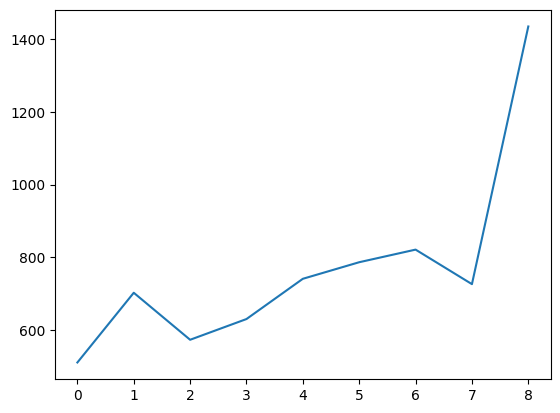

In [ ]:
plt.plot(difference)

To Maximize Capital Returns, I would look at predictions and buy and sell points. It is possible to forecast more returns if to follow the strategy of bollinger bands in the future where the deal would be the maximum. This would be the calculated difference and choosing the best time to buy and sell. If you look at the plot, you can see that I have 13 buy and sell points and the data point number 8,9,10,12,13 would give the best returns from a deal. The more accurate machine learning model for predictions the less loss will happen.Loss will never happen if to follow the predictions because it can show negative numbers so the predictions will warn and thus the loss will never happen. Hold period will be minimized if to make each deal with the positive returns.

GRU

In [ ]:
#make a model

#optimizerGRU =  SGD(lr=learning_rate,momentum=momentum, decay=decay_rate, nesterov=False)
modelGRU = Sequential()
modelGRU.add(GRU(units=256,activation = 'relu' , input_shape = (trainxx.shape[1], 2)))
modelGRU.add(Dropout(0.2))

modelGRU.add(Dense(units=1))
modelGRU.compile(optimizer="adam",loss='mean_absolute_error')#check learning rate and SGD and MAE

modelGRU.fit(trainxx,trainy,epochs=100,batch_size=4,verbose=2)

Epoch 1/100
40/40 - 5s - loss: 2762.1685 - 5s/epoch - 117ms/step
Epoch 2/100
40/40 - 1s - loss: 502.1227 - 654ms/epoch - 16ms/step
Epoch 3/100
40/40 - 1s - loss: 315.7135 - 707ms/epoch - 18ms/step
Epoch 4/100
40/40 - 1s - loss: 299.0757 - 592ms/epoch - 15ms/step
Epoch 5/100
40/40 - 0s - loss: 302.6852 - 361ms/epoch - 9ms/step
Epoch 6/100
40/40 - 0s - loss: 279.8940 - 436ms/epoch - 11ms/step
Epoch 7/100
40/40 - 0s - loss: 304.0363 - 349ms/epoch - 9ms/step
Epoch 8/100
40/40 - 0s - loss: 295.4624 - 386ms/epoch - 10ms/step
Epoch 9/100
40/40 - 0s - loss: 302.1278 - 410ms/epoch - 10ms/step
Epoch 10/100
40/40 - 0s - loss: 310.9022 - 451ms/epoch - 11ms/step
Epoch 11/100
40/40 - 0s - loss: 277.8612 - 426ms/epoch - 11ms/step
Epoch 12/100
40/40 - 0s - loss: 296.4139 - 398ms/epoch - 10ms/step
Epoch 13/100
40/40 - 0s - loss: 306.2617 - 495ms/epoch - 12ms/step
Epoch 14/100
40/40 - 1s - loss: 279.3938 - 570ms/epoch - 14ms/step
Epoch 15/100
40/40 - 0s - loss: 289.6396 - 317ms/epoch - 8ms/step
Epoch 16

In [ ]:
#predict values
predicted_stock_priceGRU = modelGRU.predict(testxx)

5/5 [==============================] - 0s 5ms/step


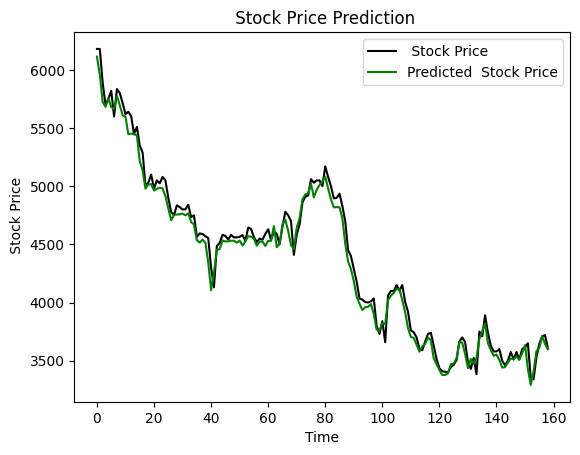

In [ ]:
#plot results
plt.plot(real_stock_price, color = 'black', label = ' Stock Price')
plt.plot(predicted_stock_priceGRU, color = 'green', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()